
# Pricing non linéaire avec le solveur Gekko
# "Pricing " non linéaire d'un seul objet

Code Python Gekko élaboré par Estelle Derrien Huleux.
Version brute sans initialisation des variables en début de code.

# Histoire : 

La société M fabrique et vend un certain produit. 
L'entreprise veut pour déterminer le prix qui maximise son profit de ce produit. 

Le coût unitaire de production et de commercialisation du produit est de 50 euros. 

Madison facturera certainement au moins 50 Euros pour le produit pour s'assurer qu'il génère des bénéfices, et donc s'assurer du seuil de rentabilité ( Break even en Anglais). 

Cependant, il existe un marché très concurrentiel pour ce produit, de sorte que la demande de Madison chute fortement lorsqu'elle augmente son prix. 

Comment l'entreprise doit-elle fixer le prix de ce produit pour s'assurer un profit maximal
?

- Source:  Wayne_L._Winston_S._Christian_Albright_Practical_Management_Science livre / Optimisations non linéaires.



On va résoudre ce problème avec le solveur Gekko, plutôt qu'avec le solveur excel,
On importe donc Gekko. 

In [1]:
from gekko import GEKKO

m = GEKKO(remote=False) # Initialize gekko

#The example problem that you referenced uses the default IPOPT solver. To get a binary or integer solution, switch to the APOPT solver.
m.options.SOLVER = 1

ETAPE 1 : On crée La variable de décision qui va contenir le prix à affecter au produit.
C'est le solveur Gekko qui va la calculer.
Si il y avait 2 objets, on ajouterait aussi les variables p2, p3, etc...

In [2]:
p1 = m.Var(integer=False)

Etape 2 , on crée la variable qui va contenir l'équation linéaire de la demande , fournie par le service commercial.
Là, pareil, si il y a plusieurs objets, forcément, leurs équations linéaires de la demande seraient différentes, donc on les ajoute aussi.

In [3]:
# x1  va contenir l'equation de la demande 
x1 = m.Var(integer=False)

Etape 3 , on crée l'équation linéaire de la demande.

L'équation de la demande représente la relation linéaire entre le prix et la demande.
Plus le prix est cher, moins les ventes sont grandes.

Il est également possible de la modéliser par une equation non linéaire d'élasticité de la demande, qui peut être plus réaliste, mais ici, on ne le fait pas.

Evidemment, si il y a plusieurs produits, on a plusieurs équations linéaires de la demande dédiées à chaque produits, et qui sont différentes, puisque les clients achètent plus ou moins en fonction de leurs gout pour chaque produits.

Il suffit que le service commercial nous donne une valeur de vente  ( Par exemple 320) pour un prix fixé à 20 euros et une valeur de vente ( par exemple 250, vu que c'est plus cher, on vend moins) pour un prix fixé à 30 euros pour qu'on obtienne cette équation linéaire de la demande, qui est une droite dans un plan (x,y).
Ca ressemble à ca ( Ne pas regarder les valeurs) : <br>
<img src  = "lin.jpg"></img>

On l'appelle x1 et on l'insère ici : 

In [4]:
m.Equation(x1 == 1100 - 10 * p1)


# Si on avait 2 objets , on créerait la seconde equation ainsi : m.Equation(x2 == 2700 - 63.8 * p2)

Etape 4, on crée les contraintes .

Dans ce problème il n'y a pas de contraintes, du style Stock de laine maximum etc ... Mais 
si on avait du entrer les contraintes, on l'aurait fait là :

In [5]:
# Equations des contraintes
# m.Equation(2 * x1 + 2.7 * x2 <= 6000)
# m.Equation(3.6 * x1 + 2.9 * x2 <= 8500)
# m.Equation(7.2 * x1 + 8.5 * x2 <= 15000)

Etape 5 : On crée la fonction objectif non linéaire qui va nous donner le prix à affecter à notre objet afin d'obtenir le
meilleur bénéfice.

In [6]:
# La fonction objectif non linéaire permet de maximiser notre profit 
# On retrouve l'équation de la demande, ce que provoque une élevation au carré de p1, et cela devient donc non linéaire.
# p1 - 50 est le profit réalisé (Prix de objet - coût de objet), x1 est l'insertion de l'équation linéaire de la demande.
m.Maximize((p1 - 50) * x1) 

# si il y avait eu plusieurs objets, on les additionne comme ça : 
# (p1 - 12) x1 + (p2 - 9) x2
# m.Maximize(((p1 - 12) * x1) + ((p2 - 9) * x2))

Etape finale : Impression de la solution 

Note : Dans le livre, Excel trouve 93.31 euros de prix optimal pour un profit de 9326 euros, j'essaye de voir quel paramètre il faut changer car ici, le solveur trouve 80 euros de prix optimal pour un profit de 9000. Dans le livre, ils utilisent l'elasticité en tant qu'équation de la demande, je me demande si c'est dû à ca ou à autre chose.. je vais essayer aussi avec d'autres solveurs en Python pour voir...

<img src = "resultat.jpg"></img>


je pense que la différence est due au fait que j'utilise la function linéaire de la demande et que dans le livre, ils utilisent la fonction d'élasticité de la demande. Le problème est que je ne sais pas encore créer avec python l'équation d'élasticité de la demande, il faut analyser et la créer. Une fois ceci fait, on pourra confirmer ou pas que la différence de résultat provient de cela.

<img src = "difference.jpg"></img>


In [7]:
m.options.IMODE = 3 # Steady state optimization

m.solve() # Solve

print('Solution')
print('x1: ' + str(p1.value))
# print('x2: ' + str(p2.value))<
print('Objectif: ' + str(m.options.objfcnval))

 ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  0
   Constants    :  0
   Variables    :  2
   Intermediates:  0
   Connections  :  0
   Equations    :  2
   Residuals    :  2
 
 Number of state variables:    2
 Number of total equations: -  1
 Number of slack variables: -  0
 ---------------------------------------
 Degrees of freedom       :    1
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  2.46593E+03  1.37500E+02
    1  5.37118E+07  1.31839E-16
    2 -9.00000E+03  3.55271E-15
    3 -9.00000E+03  8.88178E-16
    4 -9.00000E+03  8.88178E-16
 Successful solution
 
 ---------------------------------------------------
 Solver  

Problème résolu !

Merci à John Hedengren qui m'a répondu sur stack overflow et qui est vraiment un crack
C'est donc confirmé qu'il fallait utiliser la fonction d'élasticité de la demande en lieu et place de la fonction linéaire !

https://stackoverflow.com/questions/75653054/pyomo-and-gekko-pricing-values-differs-from-excel

Voici donc son code ou il a modélisé la fonction d'élasticité de la demande.

apm 185.228.230.182_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            2
   Intermediates:            0
   Connections  :            0
   Equations    :            2
   Residuals    :            2
 
 Number of state variables:              2
 Number of total equations: -            1
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              1
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program

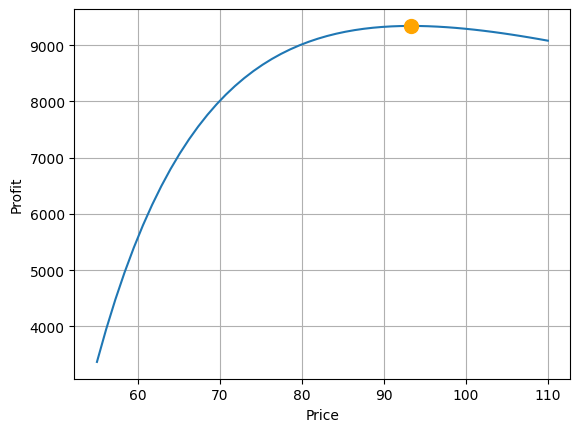

In [8]:
from gekko import GEKKO
m = GEKKO()

p = m.Var(lb=50)  # price
d = m.Var(lb=100) # demand
m.Equation(d == 3.777178e6*p**(-2.154))
m.Maximize((p-50)*d)

m.solve()
print('Solution')
price = p.value[0]
obj = -m.options.objfcnval
print(f'Price: {price:0.2f}')
print(f'Profit: {obj:0.2f}')

# view profit versus price solution
import numpy as np
import matplotlib.pyplot as plt
px = np.linspace(55,110)
dx = 3.777178e6*px**(-2.154)
profit = (px-50)*dx
plt.plot(px,profit)
plt.plot(price,obj,'o',markersize=10,color='orange')
plt.grid(); plt.xlabel('Price'); plt.ylabel('Profit')
plt.show()

Le résultat est exactement le même que celui d'Excel, ne reste plus qu'au servce commercial de fournir une équation d'élasticité de la demande, pour obtenir un Pricing qui colle au plus proche 
du nécessaire !
